In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [ ]:
# Leemos la base de datos
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


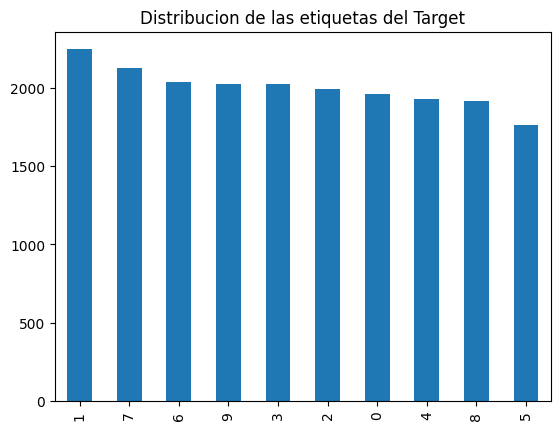

In [ ]:
# Revisamos la distribución de etiquetas
df.iloc[:,0].value_counts(sort=True).plot(kind='bar')
plt.title('Distribucion de las etiquetas del Target')
plt.show()

In [ ]:
# Tomamos una fila de ejemplo
img_example = df.iloc[0,1:].to_numpy().reshape((28,28))
img_example.shape

(28, 28)

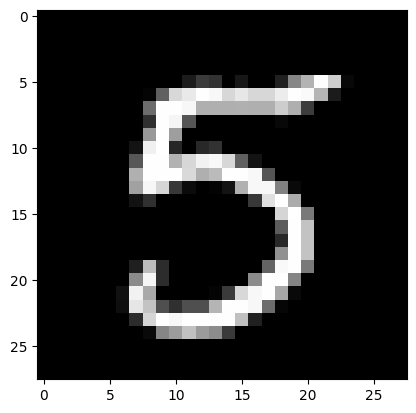

In [ ]:
# Ploteamos la fila de ejemplo
plt.figure()
plt.imshow(img_example, cmap='gray')
plt.show()

# Machine Learning

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## SVM

In [ ]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
ac_svm = accuracy_score(y_test, y_pred_svm)
print("Modelo SVM:\n")
print(classification_report(y_test, y_pred_svm))

Modelo SVM:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       637
           1       0.98      0.98      0.98       700
           2       0.89      0.95      0.92       647
           3       0.94      0.93      0.93       683
           4       0.92      0.94      0.93       651
           5       0.95      0.93      0.94       572
           6       0.97      0.97      0.97       661
           7       0.94      0.93      0.94       696
           8       0.94      0.94      0.94       642
           9       0.95      0.91      0.93       711

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600



## KNN

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_knn = clf_knn.predict(X_test)

In [ ]:
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Modelo KNN:\n")
print(classification_report(y_test, y_pred_knn))

Modelo KNN:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       637
           1       0.90      0.99      0.94       700
           2       0.95      0.87      0.91       647
           3       0.90      0.92      0.91       683
           4       0.90      0.89      0.89       651
           5       0.90      0.91      0.90       572
           6       0.96      0.94      0.95       661
           7       0.91      0.91      0.91       696
           8       0.95      0.85      0.89       642
           9       0.88      0.89      0.88       711

    accuracy                           0.91      6600
   macro avg       0.92      0.91      0.91      6600
weighted avg       0.91      0.91      0.91      6600



## Random Forest

In [ ]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
ac_rf = accuracy_score(y_test, y_pred_rf)
print("Modelo Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

Modelo Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       637
           1       0.97      0.98      0.98       700
           2       0.94      0.94      0.94       647
           3       0.95      0.94      0.94       683
           4       0.93      0.92      0.92       651
           5       0.96      0.93      0.94       572
           6       0.96      0.97      0.96       661
           7       0.95      0.95      0.95       696
           8       0.92      0.93      0.93       642
           9       0.90      0.91      0.91       711

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600



## Multilayer Perceptron

In [ ]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300)
clf_mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [ ]:
y_pred_mlp = clf_mlp.predict(X_test)

In [ ]:
ac_mlp = accuracy_score(y_test, y_pred_mlp)
print("Modelo Multilayer Perceptron:\n")
print(classification_report(y_test, y_pred_mlp))

Modelo Multilayer Perceptron:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       637
           1       0.97      0.99      0.98       700
           2       0.95      0.95      0.95       647
           3       0.96      0.95      0.95       683
           4       0.93      0.94      0.93       651
           5       0.94      0.95      0.95       572
           6       0.97      0.97      0.97       661
           7       0.95      0.95      0.95       696
           8       0.96      0.93      0.94       642
           9       0.94      0.94      0.94       711

    accuracy                           0.95      6600
   macro avg       0.95      0.95      0.95      6600
weighted avg       0.95      0.95      0.95      6600



# Discusión

El perceptrón multicapa (MLP) es una red neuronal ampliamente utilizada para propósitos de clasificación de imágenes. A grandes rasgos, su funcionamiento se basa en varias capas de neuronas interconectadas, divididas en una capa de entrada, una o varias capas ocultas y una capa de salida. Primero, se proporciona un conjunto de datos de entrada (en este caso, una imagen representada como una matriz de píxeles). Los datos de entrada pasan por una capa inicial, donde cada neurona representa una característica o valor específico que transmite a las neuronas de la siguiente capa, logrando que dichos datos se propaguen hacia adelante a través de una o varias capas ocultas, responsables de extraer características más complejas y abstractas de los datos de entrada a según se profundiza en la red. Cada neurona en una capa oculta toma como entrada las salidas de las neuronas de la capa anterior y realiza una transformación utilizando una función de activación. Después de pasar a través de las capas ocultas, los datos llegan a la capa de salida. La capa de salida generalmente contiene neuronas que representan las clases o categorías en las que se desea clasificar [1].

Los resultados obtenidos de la clasificación de imágenes de digitos realizada por MLP respecto a sus valores de accuracy y recall mostraron ser ligeramente superiores a los obtenidos por modelos convencionales de ML, como son RF, KNN y SVM. Sin embargo, en este caso particular, la diferencia no se puede considerar suficientemente significativa para concluir que es mejor aplicar MLP. Por otro lado, hay estudios que respaldan que la aplicación de MLP suele relacionarse con mejores valores de las métricas de rendimiento de un modelo para clasificación de imágenes en general. Por ejemplo, Kumar & Kumar (2023) compararon el rendimiento de los modelos DT, LR, NB, KNN, SVM y MLP para clasificación de imágenes de hojas de plantas, obteniendo el mejor resultado precisamente con MLP [2]. No obstante, Fernández et al. (2003) compararon los modelos KNN, SVM y MLP para la clasificación y obtuvieron un mayor accuracy para el modelo SVM con el vector LLT [3]. Esto sugiere que el preprocesamiento de la data para alimentar los modelos influye de forma considerable en el rendimiento de cada uno, independientemente del funcionamiento del modelo.

## Conclusiones

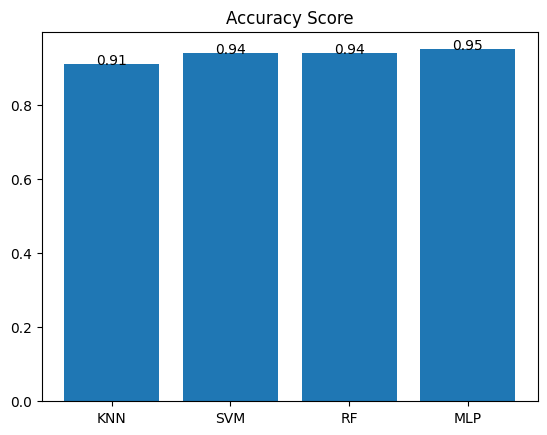

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

scores = np.round([ac_knn, ac_svm, ac_rf, ac_mlp], 2)
plt.bar(['KNN','SVM','RF','MLP'], scores)
addlabels(['KNN','SVM','RF','MLP'], scores)
plt.title('Accuracy Score')
plt.show()

1. Como se mencionó en la discusión, no se puede llegar a una conclusión precisa de cuál modelo se comporta mejor con la data proporcionada. Aunque a primera vista el MLP nos da un mejor valor de acurracy, la modificación de los hiperparametros con los cuales entrenamos los modelos pueden cambiar el score obtenido. Por lo tanto, debido a la proximidad relativa de los scores obtenidos, no es posible llegar a una afirmación segura.

2. El pre procesamiento de las imágenes antes de realizar el entrenamiento de los modelos, es un factor relevante en los resultados obtenido. El pre procesamiento puede modificar ciertas características de la imagen que son importantes para los algoritmos propios del entrenamiento de modelos. Realizando modificaciones como cambie la orientación, el tamaño o la escala de color de la imagen, puede alterar los resultados [4].

## Referencias

[1] M. E. Cecchinato y A. L. Cox, "Smartwatches: Digital Handcuffs or Magic Bracelets?", Computer, vol. 50, n.º 4, pp. 106–109, abril de 2017. Accedido el 31 de mayo de 2023. [En línea]. Disponible: https://doi.org/10.1109/mc.2017.117

[2] Kumar, C., Kumar, V. (2023). Vegetable Plant Leaf Image Classification Using Machine Learning Models. In: Reddy, A.B., Nagini, S., Balas, V.E., Raju, K.S. (eds) Proceedings of Third International Conference on Advances in Computer Engineering and Communication Systems. Lecture Notes in Networks and Systems, vol 612. Springer, Singapore. https://doi.org/10.1007/978-981-19-9228-5_4

[3] Fernández-Delgado, M & Carrión, Pilar & Cernadas, E. & Galvez, J.F. (2003). Improved Classification of Pollen Texture Images Using SVM and MLP. 3rd IASTED International Conference on Visualization, Imaging and Image Processing (VIIP2003).

[4] isahit. "What is the purpose of image preprocessing in deep learning?" Isahit - Ethicalâ¨ On-demand Worforce Platform for your digital tasks. https://www.isahit.com/blog/what-is-the-purpose-of-image-preprocessing-in-deep-learning (accedido el 31 de mayo de 2023).